In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [29]:
file_path = "/content/penguins_size.csv"
df = pd.read_csv(file_path)

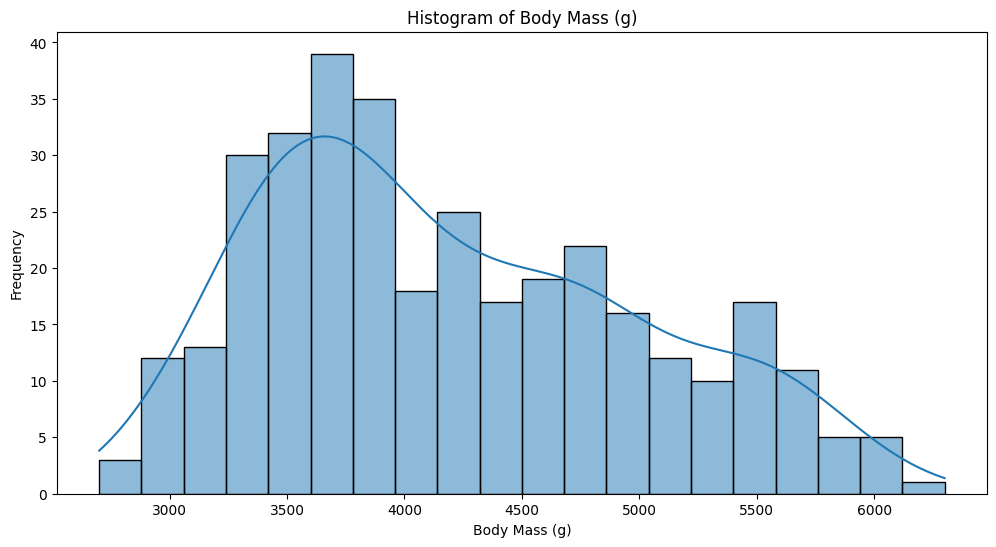

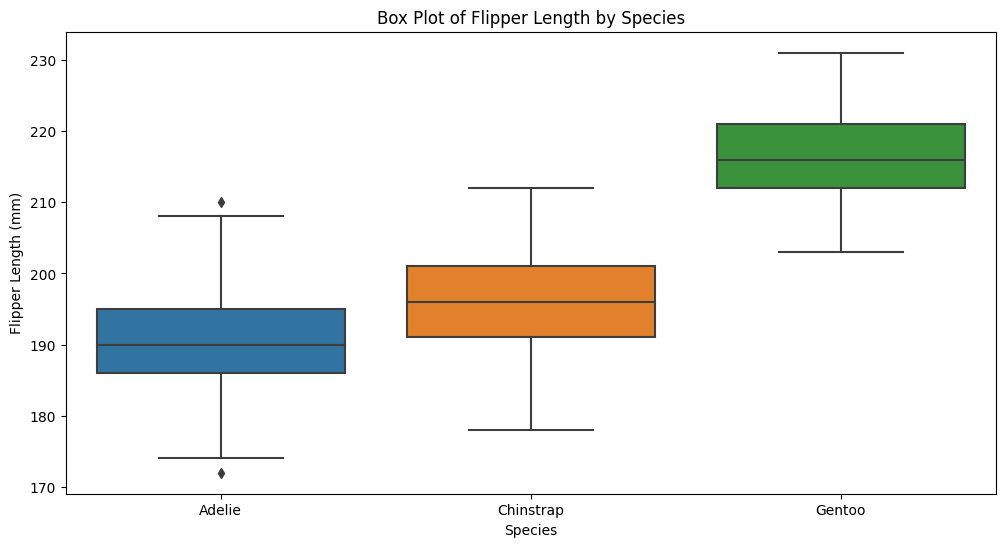

<ipython-input-35-ca6a13648d13>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




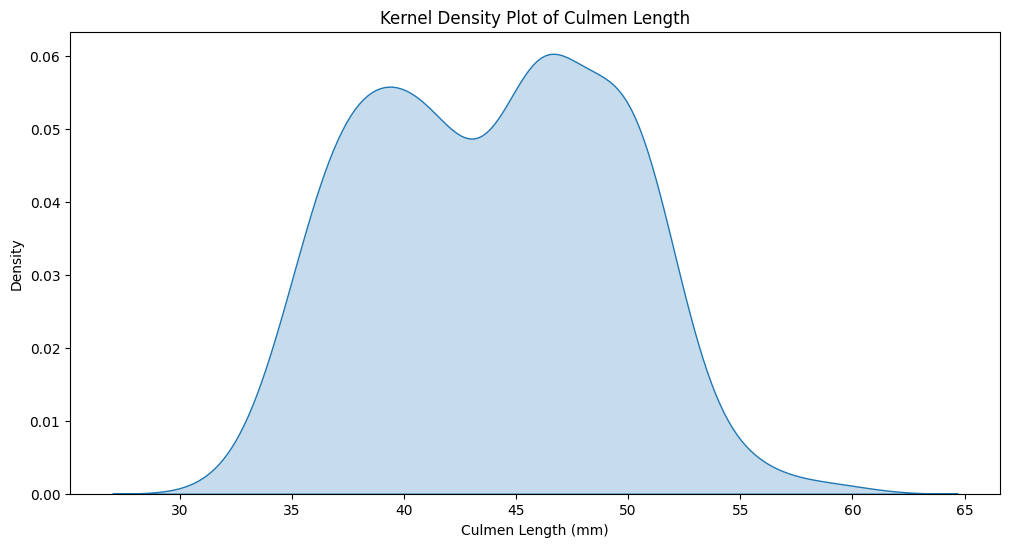

In [35]:
# Univariate analysisis
# Plot 1: Histogram of Body Mass
plt.figure(figsize=(12, 6))
sns.histplot(df['body_mass_g'], bins=20, kde=True)
plt.title('Histogram of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Box Plot of Flipper Length
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Box Plot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

# Plot 3: Kernel Density Plot of Culmen Length
plt.figure(figsize=(12, 6))
sns.kdeplot(df['culmen_length_mm'], shade=True)
plt.title('Kernel Density Plot of Culmen Length')
plt.xlabel('Culmen Length (mm)')
plt.show()

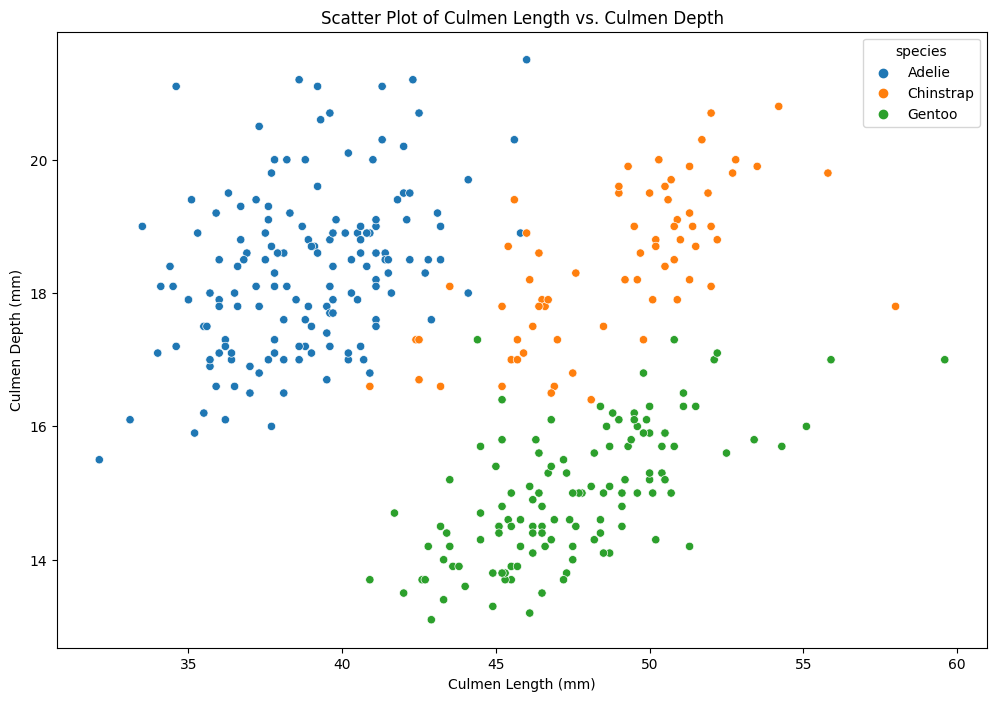

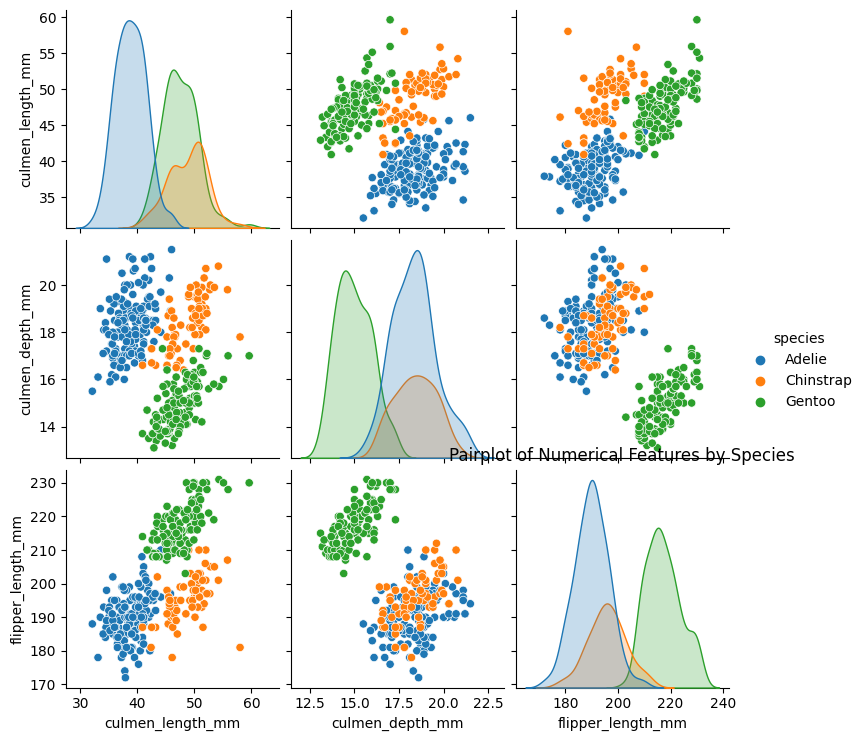

<ipython-input-36-4ef9336d90b1>:16: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



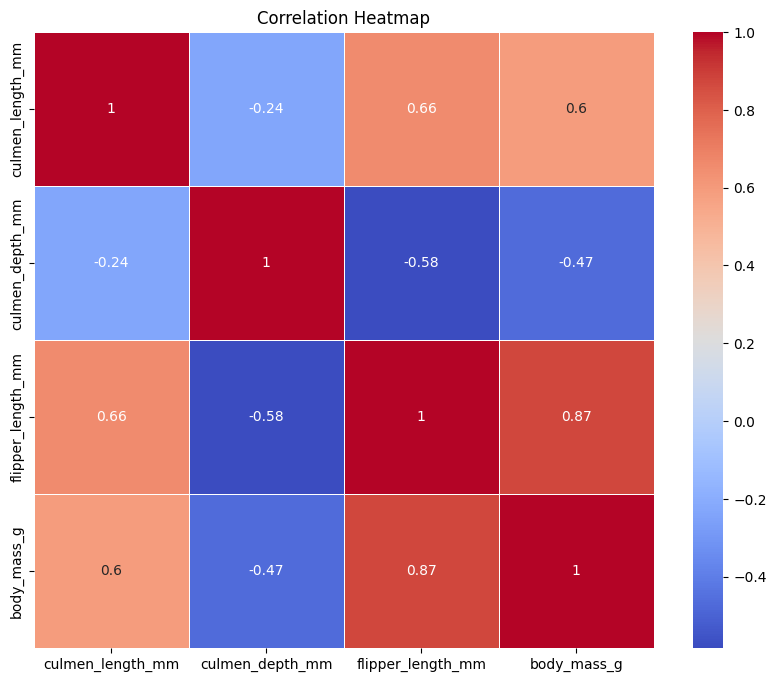

In [36]:
# Bivariate Analysis
# Plot 1: Scatter Plot of Culmen Length vs. Culmen Depth
plt.figure(figsize=(12, 8))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df)
plt.title('Scatter Plot of Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

# Plot 2: Pairplot of Numerical Features
sns.pairplot(df, hue='species', vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
plt.title('Pairplot of Numerical Features by Species')
plt.show()

# Plot 3: Heatmap of Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



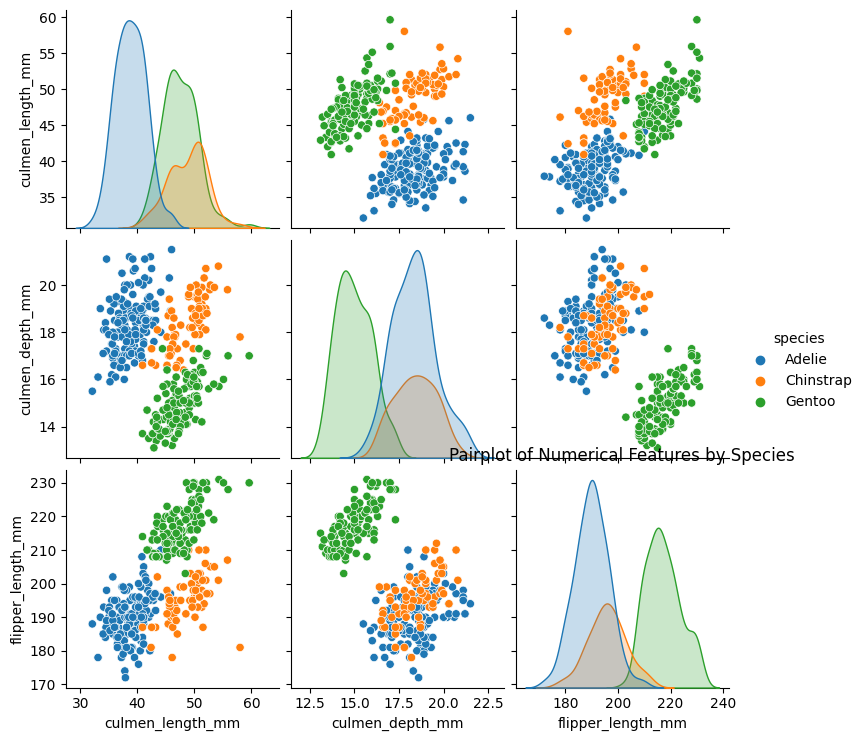

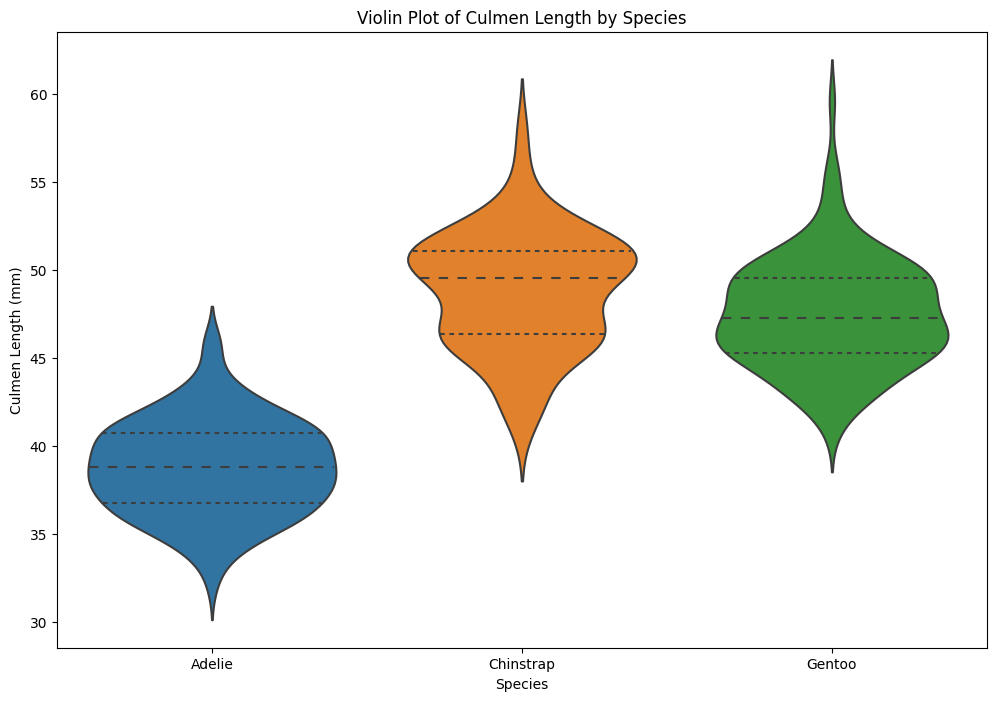

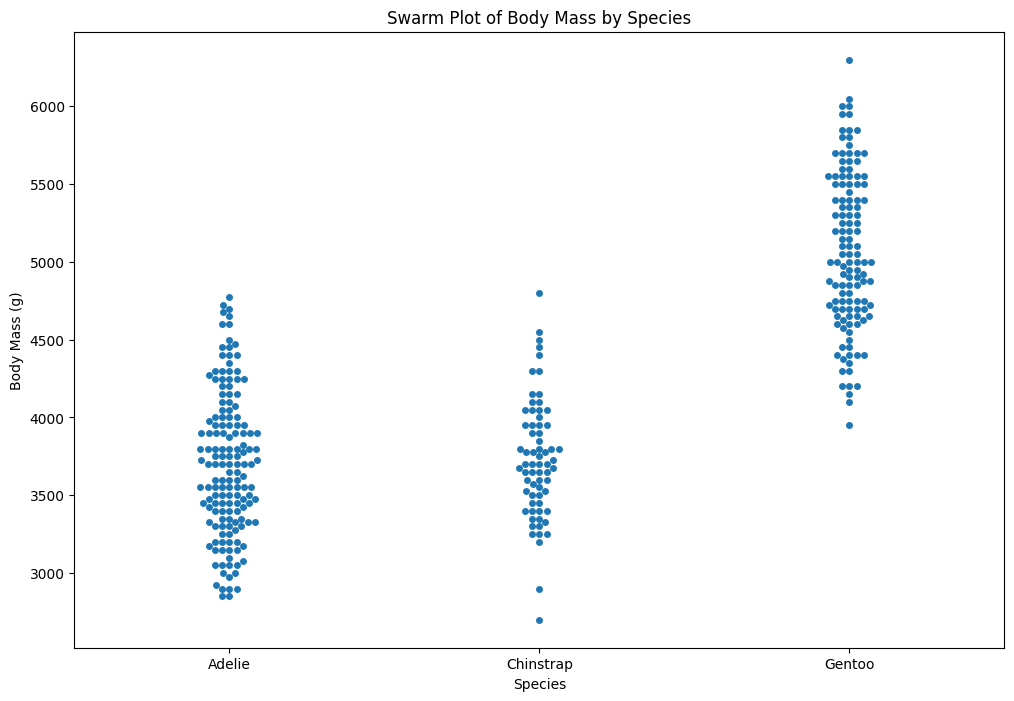

In [41]:
# Multivariate Analysis
# Plot 1: Pairplot of Numerical Features
sns.pairplot(df, hue='species', vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
plt.title('Pairplot of Numerical Features by Species')
plt.show()

# Plot 2: Violin Plot of Numerical Features by Species
plt.figure(figsize=(12, 8))
sns.violinplot(x='species', y='culmen_length_mm', data=df, inner='quart')
plt.title('Violin Plot of Culmen Length by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

# Plot 3: Swarm Plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='species', y='body_mass_g', data=df)
plt.title('Swarm Plot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()



In [42]:
#Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [44]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [45]:
df.dropna(inplace=True)


In [51]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)


In [47]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [53]:
df['culmen_length_mm'].ffill(inplace=True)  # Forward fill
df['culmen_length_mm'].bfill(inplace=True)  # Backward fill
df['culmen_depth_mm'].ffill(inplace=True)  # Forward fill
df['culmen_depth_mm'].bfill(inplace=True)  # Backward fill
df['flipper_length_mm'].ffill(inplace=True)  # Forward fill
df['flipper_length_mm'].bfill(inplace=True)  # Backward fill
df['body_mass_g'].ffill(inplace=True)  # Forward fill
df['body_mass_g'].bfill(inplace=True)  # Backward fill
df['sex'].ffill(inplace=True)  # Forward fill
df['sex'].bfill(inplace=True)  # Backward fill

In [55]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

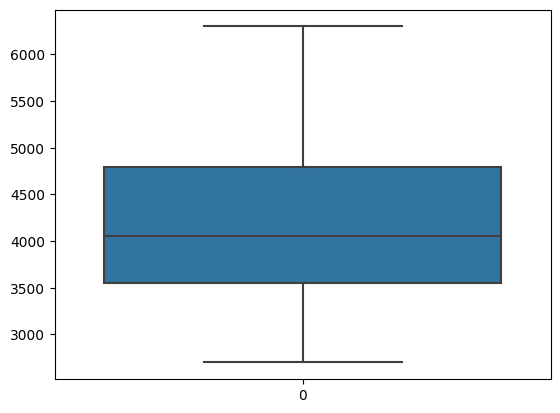

In [63]:
#checking ouliers
sns.boxplot(df.body_mass_g)


<Axes: >

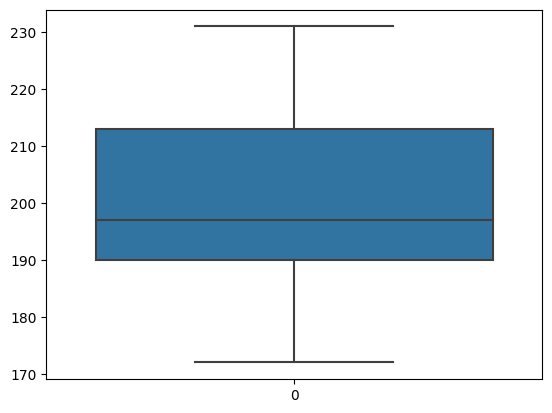

In [64]:
sns.boxplot(df.flipper_length_mm)


<Axes: >

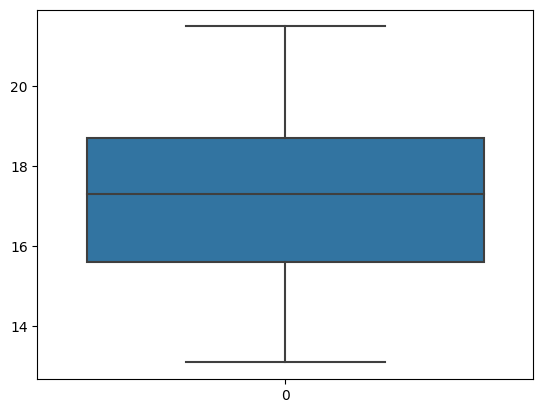

In [65]:
sns.boxplot(df.culmen_depth_mm)


<Axes: >

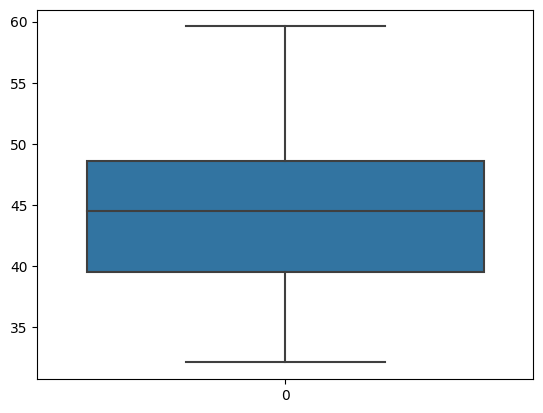

In [66]:
sns.boxplot(df.culmen_length_mm)

In [67]:
#no outliers

In [71]:
# Check the correlation of independent variables with the target
df.corr()


<ipython-input-71-11907088e578>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


<ipython-input-72-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

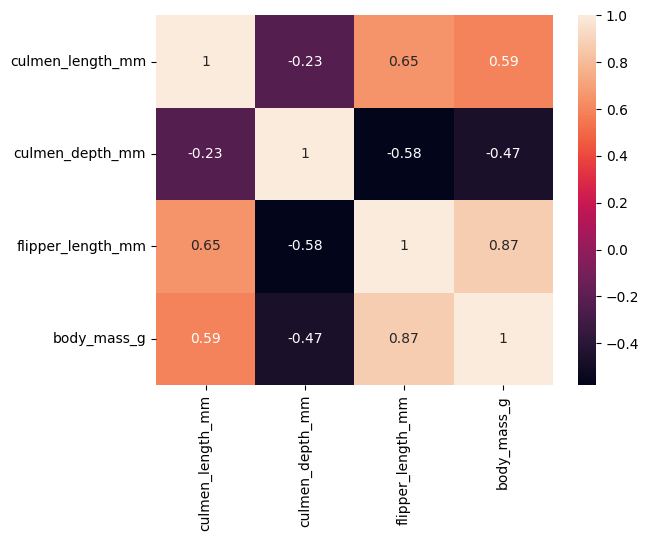

In [72]:
sns.heatmap(df.corr(),annot=True)

In [75]:
df.corr().body_mass_g.sort_values(ascending=False)

<ipython-input-75-94e77a915008>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



body_mass_g          1.000000
flipper_length_mm    0.873211
culmen_length_mm     0.589066
culmen_depth_mm     -0.472987
Name: body_mass_g, dtype: float64

In [76]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [77]:
# 8. Check for Categorical columns and perform encoding
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)


In [78]:
X = df.drop(columns=['species'])
y = df['species']


In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [81]:
# Check the training and testing data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (267, 6)
X_test shape: (67, 6)
y_train shape: (267,)
y_test shape: (67,)
